# Bike Sharing Model   
## A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic

## Aim is to understand the factors on which the demand for shared bikes depends. Specifically,  understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
## 1. Which variables are significant in predicting the demand for shared bikes.
## 2. How well those variables describe the bike demands

## Step 1: Data analysis



### Step 1.1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [419]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("statsmodels version:", sm.__version__)
print("scikit-learn version:", sklearn.__version__)
print("matplotlib version:", mlt.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
seaborn version: 0.13.2
statsmodels version: 0.14.4
scikit-learn version: 1.6.1
matplotlib version: 3.10.0


In [421]:
bike = pd.read_csv("day.csv")

In [423]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [426]:
bike.shape

(730, 16)

In [428]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [430]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [432]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Step 1.2: Data Cleaning
Check for null Values

In [435]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Remove unwanted columns. There are columns which can be dropped 

#### 1. Column instant can be dropped as we have index
#### 2. dteday is not useful as month and weekday are covering it

In [438]:
bike.drop(['instant'],axis=1,inplace=True)
bike.drop(['dteday'],axis=1,inplace=True)

#### 3. Likely casual & registered can be dropped as well be as the same can be explained by cnt column. Lets verify this once with Correlation matirx 

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

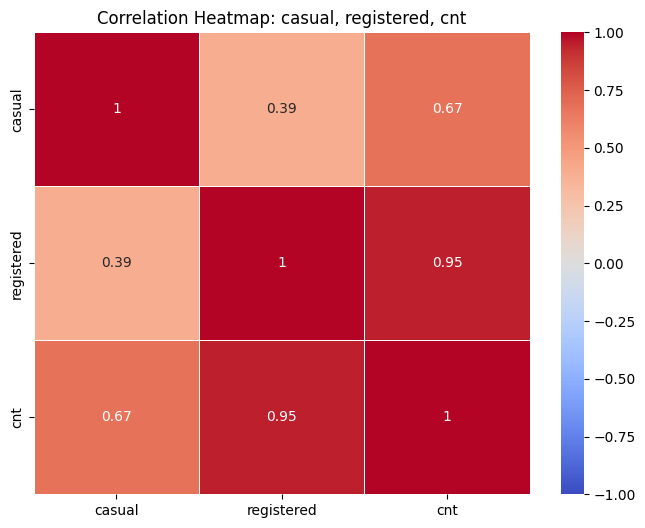

In [443]:
corr_data = bike[['casual', 'registered', 'cnt']]

# Calculate the correlation matrix
correlation_matrix = corr_data.corr()
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap: casual, registered, cnt")
plt.show()

#### As there is high correlation lets drop registered & casual

In [446]:
bike.drop(['casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 1.3: Datatype conversion and derived metrics

In [449]:
bike.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### we can clearly see that season,month, weekday, weathersit which are suppose to be non-numerical are numerical so lets change 

In [452]:
# 'mnth' column
## Converting 'mnth' column to string name of the month
bike.mnth = bike.mnth.astype('str').map({'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'})



In [454]:
bike.season = bike.season.astype('str').map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'})


In [456]:
# 'weekday' column
## Converting 'weekday' column to string name of the day
bike.weekday = bike.weekday.astype('str').map({'1':'Mon', '2':'Tue', '3':'Wed', '4':'Thu', '5':'Fri', '6':'Sat', '0':'Sun'})

In [458]:
# 'weathersit' column
## Converting 'weathersit' column to sting name of the weather situation
	# + weathersit : 
	# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike.weathersit = bike.weathersit.astype('str').map({'1':'Clear', '2':'Cloudy', '3':'Rainy', '4':'Storm'})



In [460]:

## Rounding the values of 'temp','atemp','hum','windspeed' columns to 3 decimal places
bike[['temp','atemp','hum','windspeed']] = bike[['temp','atemp','hum','windspeed']].round(3)

In [462]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.111,18.181,80.583,10.750,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.903,17.687,69.609,16.652,801
2,spring,0,Jan,0,Mon,1,Clear,8.051,9.470,43.727,16.637,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200,10.606,59.044,10.740,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305,11.464,43.696,12.522,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable


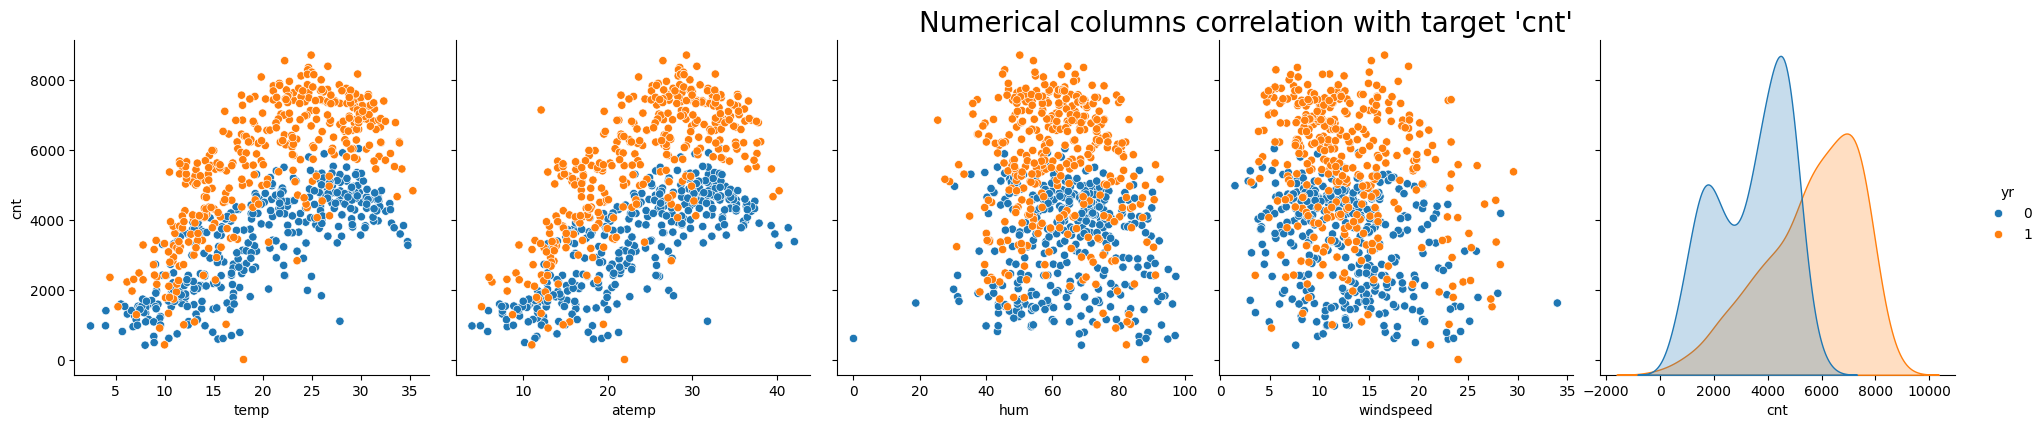

In [465]:
# Checking pairplot of Numerical columns for correlationq

## Numerical columns
num_cols=['temp','atemp','hum','windspeed', 'cnt']

sns.pairplot(data=bike,x_vars=num_cols,y_vars='cnt',diag_kind='kde',hue='yr',palette='tab10',size=4)
plt.title("Numerical columns correlation with target 'cnt'",fontsize=20,color='black',x=-1.0)
plt.show()

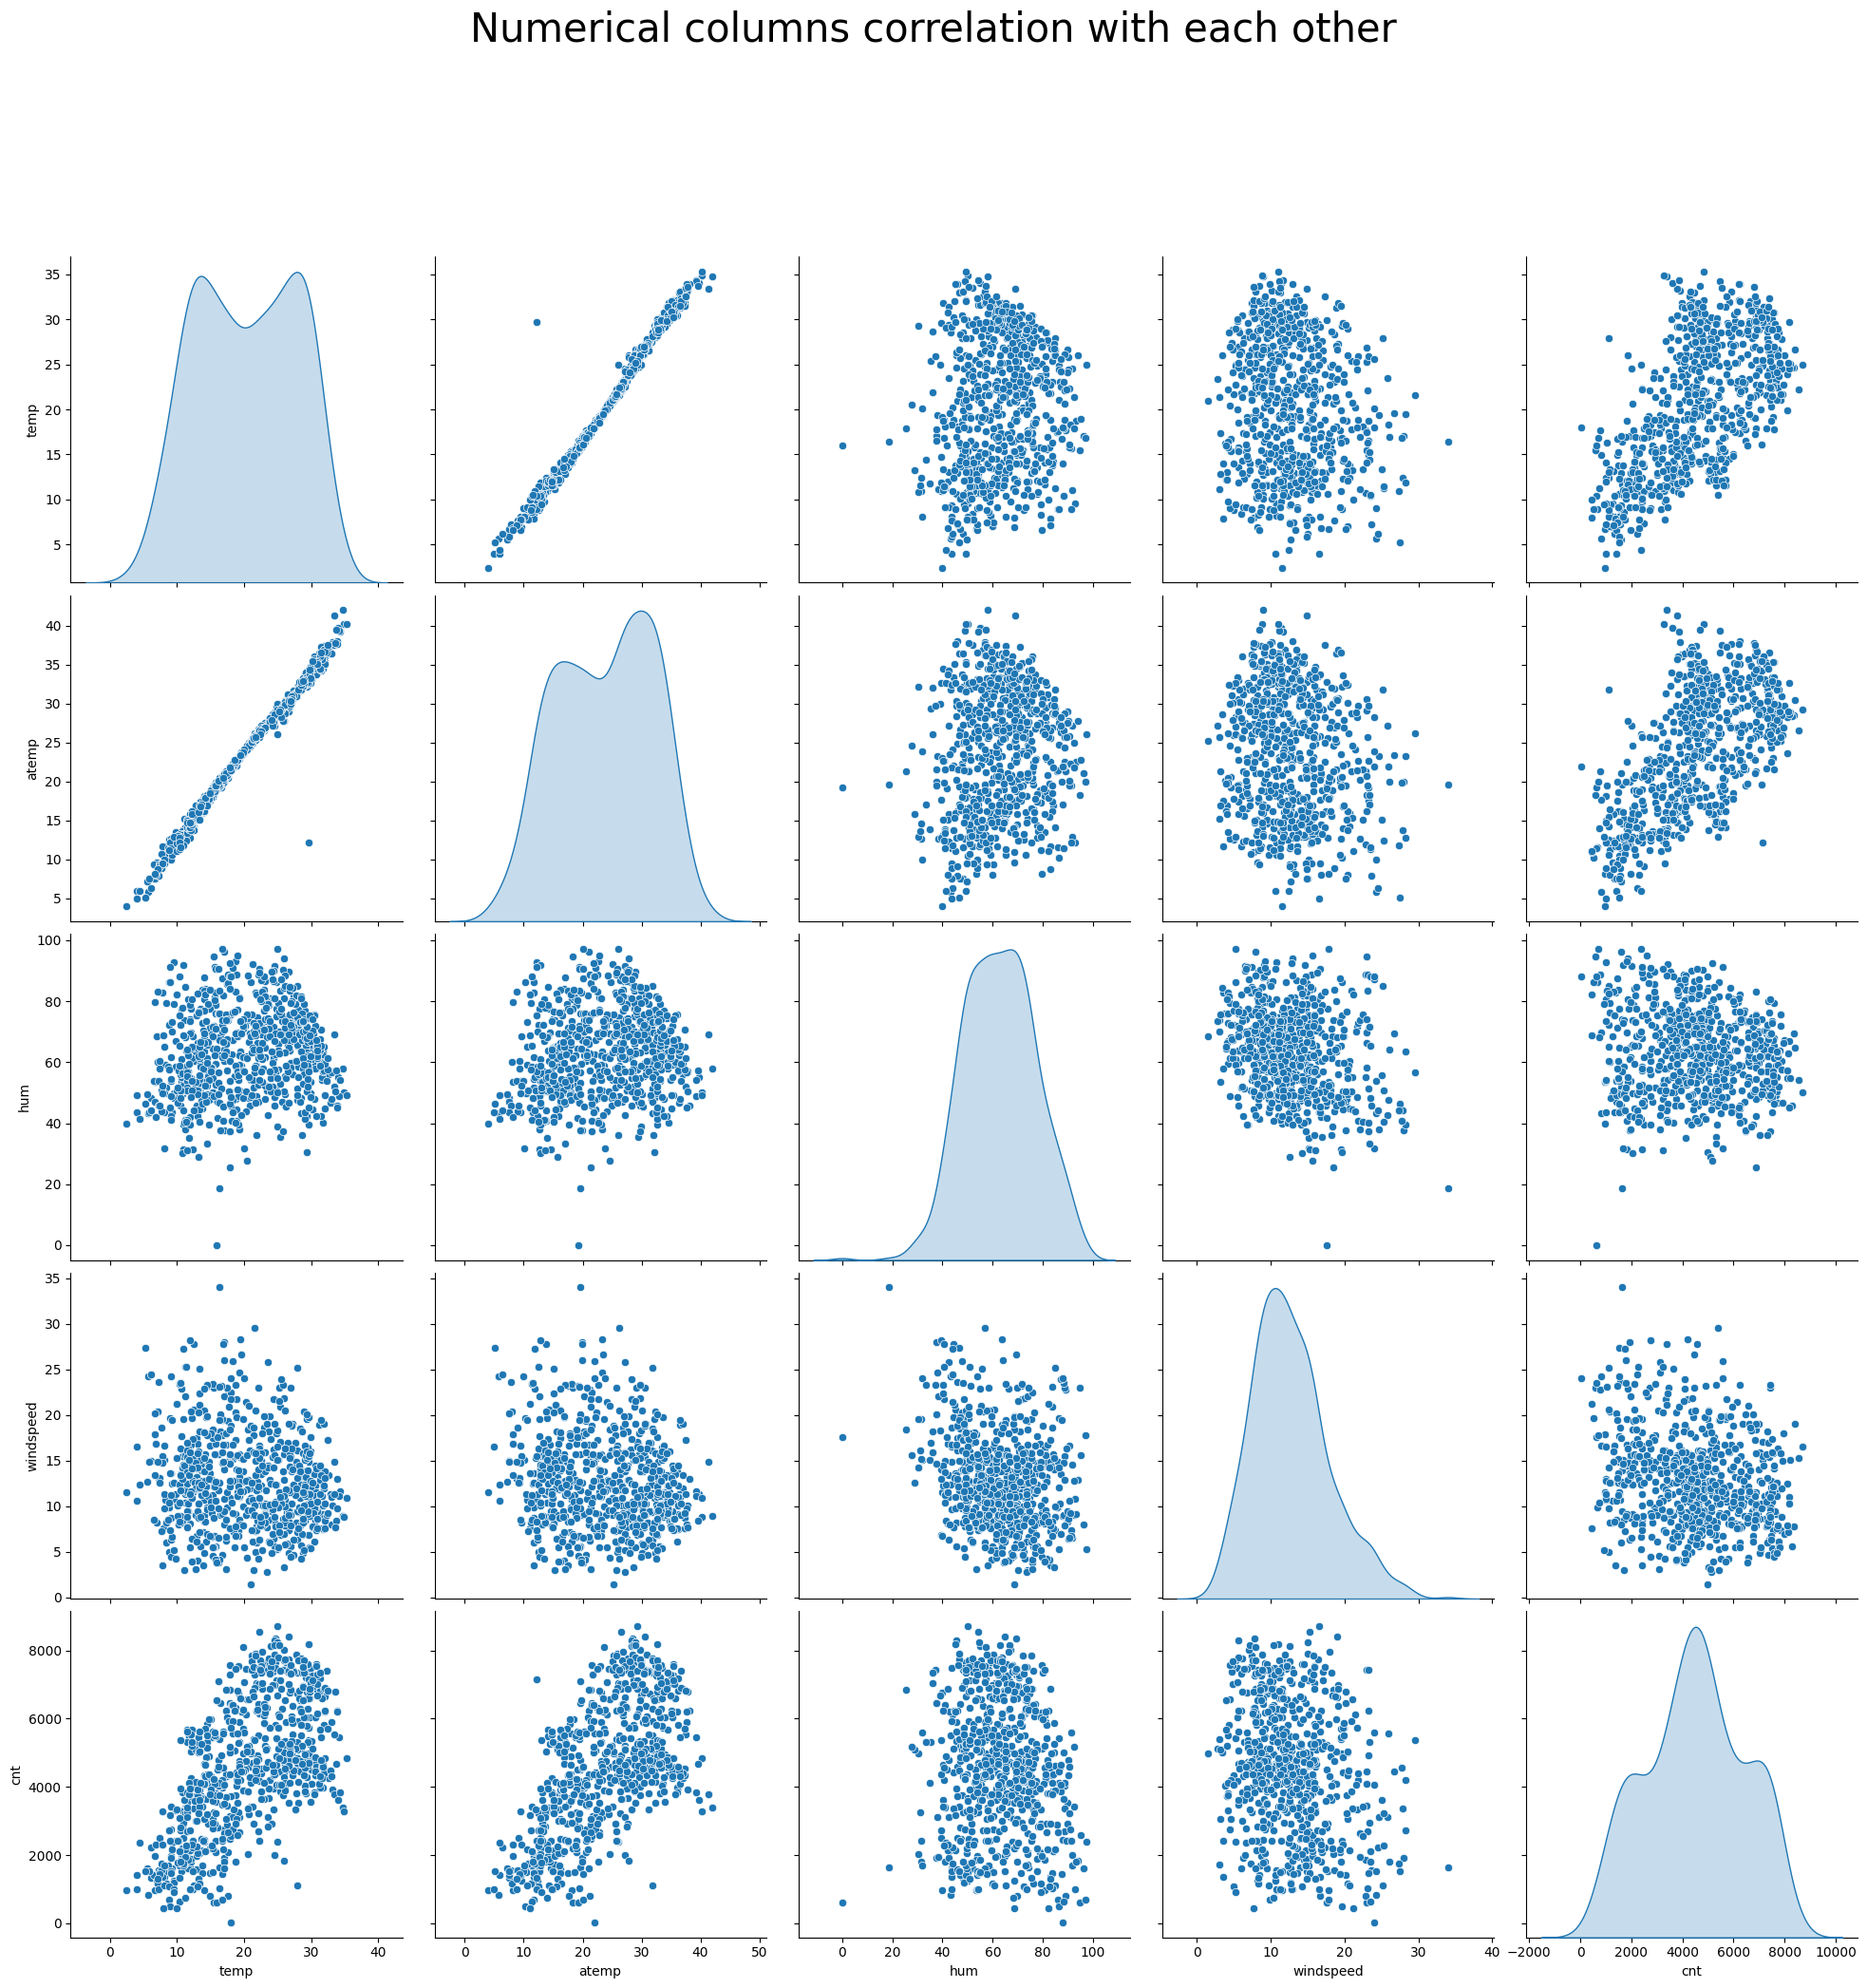

In [467]:
g = sns.pairplot(data=bike, x_vars=num_cols, y_vars=num_cols, diag_kind='kde', palette='tab10', height=4)

# Set the title
plt.suptitle("Numerical columns correlation with each other", fontsize=30, color='black', x=0.5, y=1.05, ha='center')

# Adjust layout to make room for the title
plt.subplots_adjust(top=0.92)  # You can tweak this value to add more or less space

plt.show()

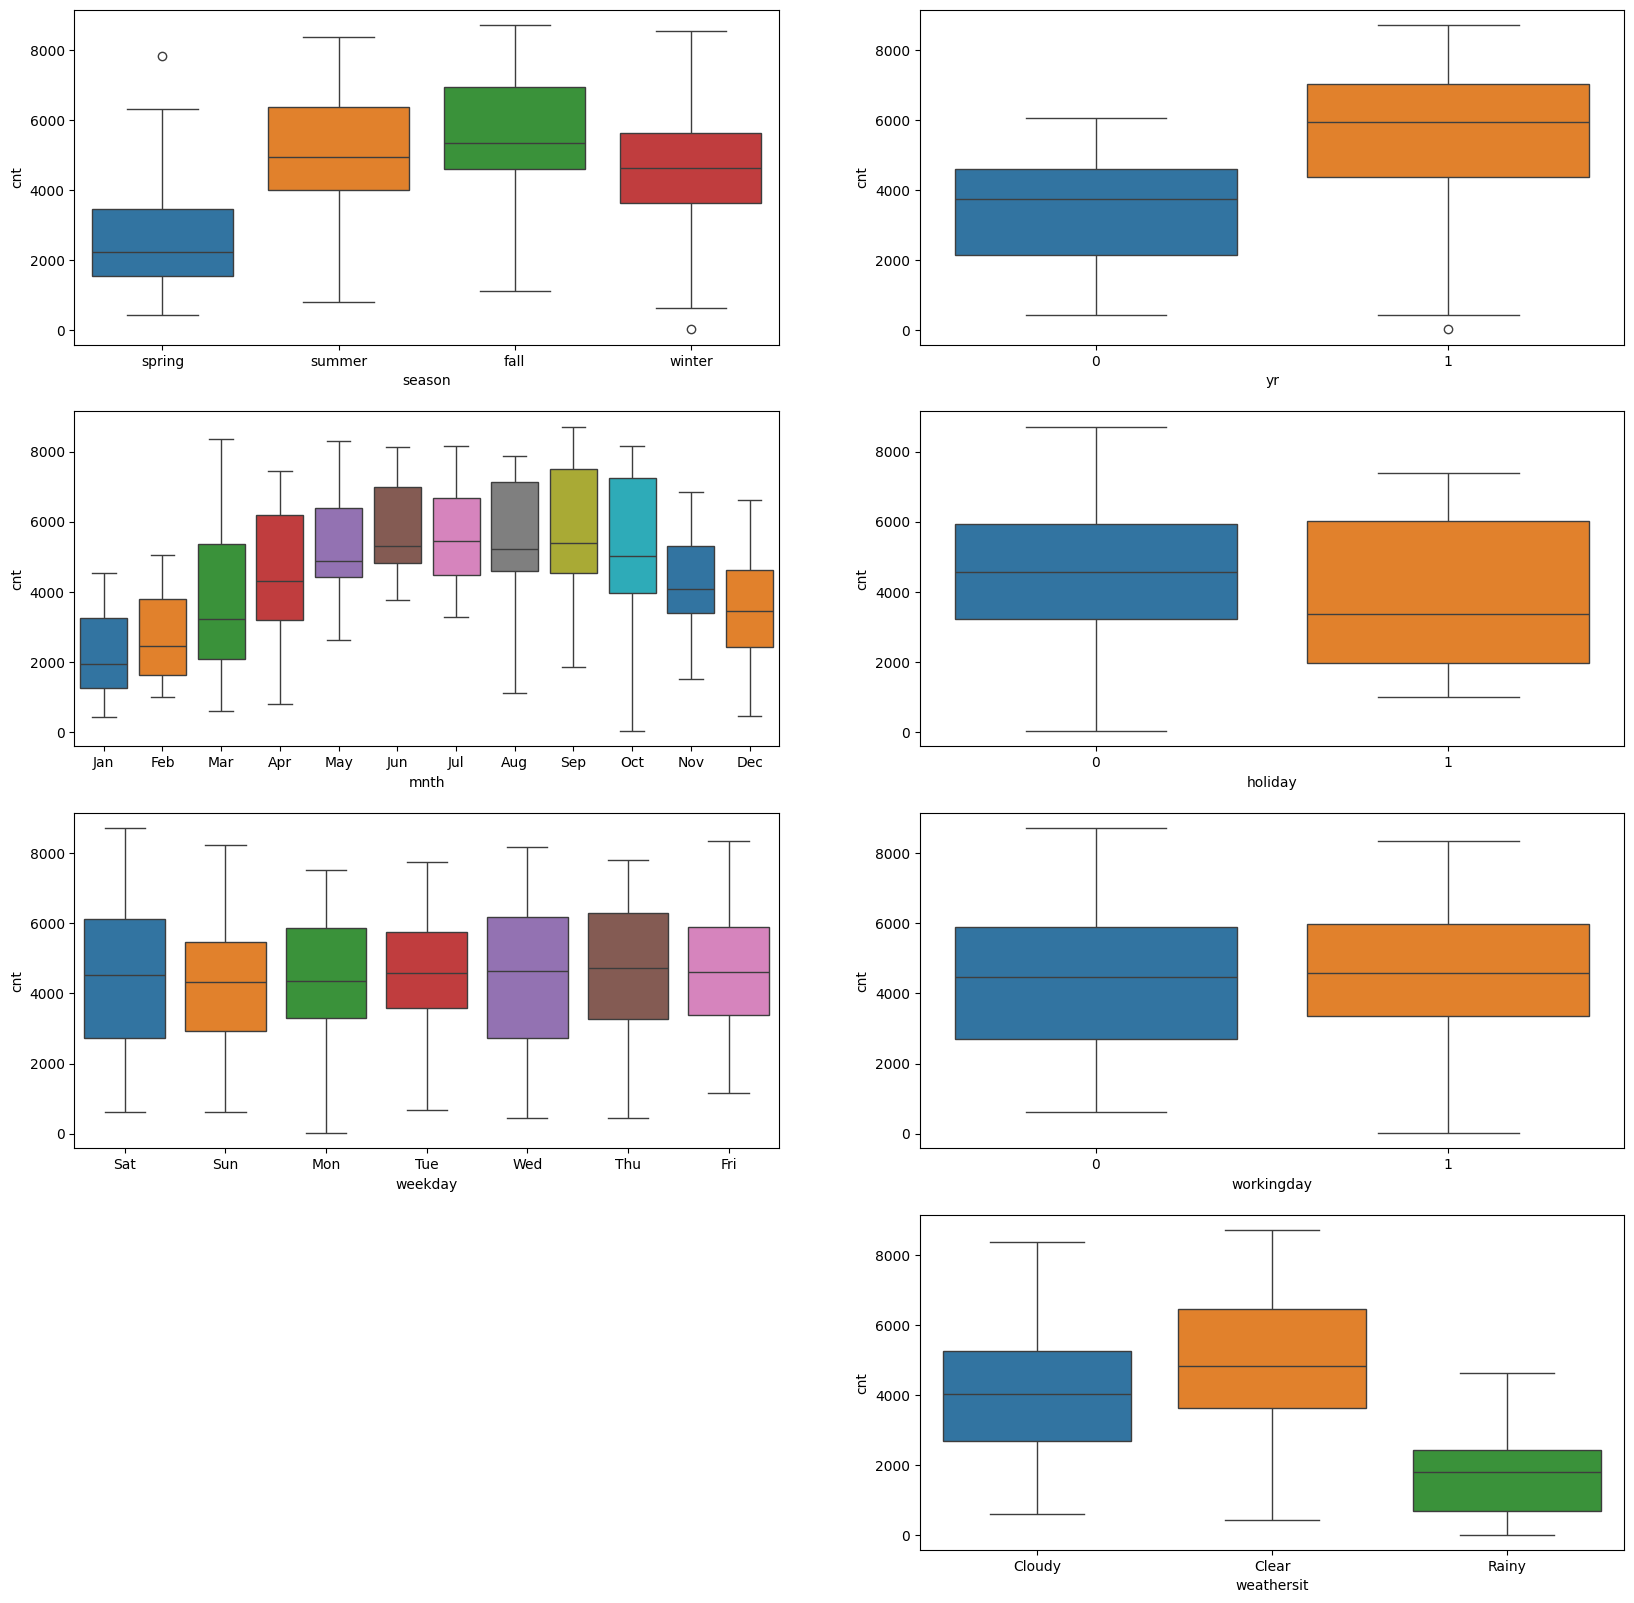

In [468]:
# Checking boxplot of Categories columns
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bike,palette='tab10')
plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=bike,palette='tab10')
plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt',data=bike,palette='tab10')
plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike,palette='tab10')
plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike,palette='tab10')
plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt',data=bike,palette='tab10')
plt.subplot(4,2,8)
sns.boxplot(x='weathersit',y='cnt',data=bike,palette='tab10')
plt.show()

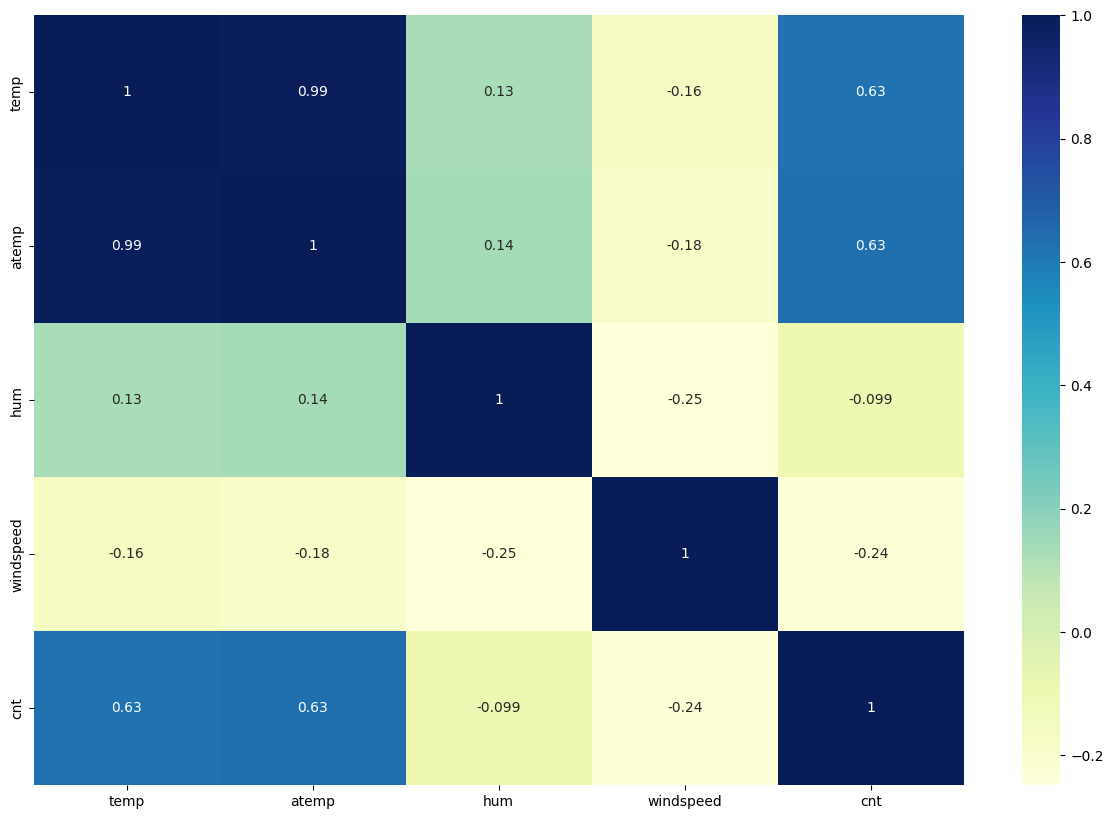

In [470]:
plt.figure(figsize=(15,10))
sns.heatmap(bike[num_cols].corr(),cmap="YlGnBu",annot=True)
plt.show()

### Step 3: Data Preparation for Linear Model

#### Step 3.1: Creating dummy variables for categorical variables

In [475]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.111,18.181,80.583,10.750,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.903,17.687,69.609,16.652,801
2,spring,0,Jan,0,Mon,1,Clear,8.051,9.470,43.727,16.637,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200,10.606,59.044,10.740,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305,11.464,43.696,12.522,1600


In [477]:
# Dummy variables for 'season' column
bike = pd.get_dummies(bike,columns=['season'],drop_first=True)
# Dummy variables for 'mnth' column
bike = pd.get_dummies(bike,columns=['mnth'],drop_first=True)
# Dummy variables for 'weekday' column
bike = pd.get_dummies(bike,columns=['weekday'],drop_first=True)
# Dummy variables for 'weathersit' column
bike = pd.get_dummies(bike,columns=['weathersit'],drop_first=True)


In [479]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
0,0,0,0,14.111,18.181,80.583,10.750,985,True,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.903,17.687,69.609,16.652,801,True,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.051,9.470,43.727,16.637,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200,10.606,59.044,10.740,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305,11.464,43.696,12.522,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


In [481]:
# Step 1: Identify columns of type 'bool'
bool_columns = bike.select_dtypes(include=['bool']).columns

# Step 2: Convert those columns to 'int64'
bike[bool_columns] = bike[bool_columns].astype(int)


In [483]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
0,0,0,0,14.111,18.181,80.583,10.750,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.903,17.687,69.609,16.652,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.051,9.470,43.727,16.637,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200,10.606,59.044,10.740,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305,11.464,43.696,12.522,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Step 3.2: Splitting the data into training and test set

In [486]:
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [488]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
653,1,0,1,19.202,23.042,55.833,12.209,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.247,33.145,70.417,11.083,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.981,20.675,62.125,10.792,4066,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489,11.585,48.333,23.501,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443,18.875,48.958,8.708,4220,0,1,...,0,0,0,1,0,0,0,0,1,0


In [490]:
# Checking shape and size for train and test to ensure 70:30 split
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [492]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Rainy'],
      dtype='object')

#### Step 3.3: Scaling the train data set and test data set

In [495]:
# Scaling using MinMaxScaler
scaler = MinMaxScaler()
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','cnt']


#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [497]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537273,0.512993,0.650367,0.320776,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225843,0.212381,0.145882,0.169795,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339860,0.332097,0.538640,0.199191,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540527,0.526817,0.653712,0.296782,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735230,0.688465,0.754830,0.414450,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 4: Build model 

In [500]:
y_train = df_train.pop('cnt')
X_train = df_train

In [502]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [504]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [506]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Rainy', True, 1)]

In [508]:
#Print Columns selected by RFE. We will manually eliminate some of these columns based on model parameters 
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weathersit_Cloudy',
       'weathersit_Rainy'],
      dtype='object')

In [510]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weathersit_Cloudy', 'weathersit_Rainy']]

X_train_rfe.shape

X_train.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537273,0.512993,0.650367,0.320776,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225843,0.212381,0.145882,0.169795,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339860,0.332097,0.538640,0.199191,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540527,0.526817,0.653712,0.296782,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735230,0.688465,0.754830,0.414450,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 4.1 Model building - 1st iteration of Linear model 

In [513]:
#Selected columns for Model 1 - all columns selected by RFE
X_train_const = sm.add_constant(X_train_rfe)

lm=sm.OLS(y_train,X_train_const).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.31e-191
Time:                        23:31:37   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.036      6.948      0.000       0.180       0.322
yr                    0.2305      0.008     28.807      0.000       0.215       0.246
holiday              -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday            0.0435      0.012      3.781      0.000       0.021       0.066
temp                  0.5098      0.034     14.851      0.000       0.442       0.577
hum                  -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed            -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring        -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer         0.0497      0.015      3.346      0.001       0.020       0.079
season_winter         0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan             -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul             -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep              0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat           0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Cloudy    -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weathersit_Rainy     -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.342   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.553
Skew:                          -0.676   Prob(JB):                     8.30e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [516]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [518]:
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_Cloudy,2.29
0,yr,2.09
12,weekday_Sat,1.98


humidity shows high VIF value.

#### Step 4.2 Model building - 2nd iteration of Linear model 

In [522]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

X_train_lm_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          7.34e-189
Time:                        23:31:38   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1737      0.03

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
11,weekday_Sat,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


'mnth_Jan' shows high p value. we can drop

#### Step 4.3 Model building - 3rd iteration of Linear model 

In [526]:
X_train_new = X_train_new.drop(['mnth_Jan'], axis = 1)

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          5.73e-189
Time:                        23:31:39   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1577      0.03

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_spring,2.49
6,season_summer,2.32
0,yr,2.07
7,season_winter,1.99
10,weekday_Sat,1.96
8,mnth_Jul,1.58
11,weathersit_Cloudy,1.56


'holiday' & 'mnth_Jul' shows high p value. As from Business perspective, 'holiday' is significant, lets drop 'mnt_Jul'

#### Step 4.4 Model building - 4th iteration of Linear model 

In [530]:
X_train_new = X_train_new.drop(['mnth_Jul'], axis = 1)

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.49e-188
Time:                        23:31:40   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1484      0.03

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
5,season_spring,2.40
0,yr,2.07
6,season_summer,2.00
9,weekday_Sat,1.96
7,season_winter,1.83
10,weathersit_Cloudy,1.56
8,mnth_Sep,1.24


'workingday' and 'temp' both shows high VIF. Although we can drop temp, from business impact perspective temp has more influence on business, so we can decide to keep it for now and drop 'workingday'

In [533]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.79e-186
Time:                        23:31:41   Log-Likelihood:                 496.65
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     498   BIC:                            -918.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1875      0.03

,Features,VIF
3,windspeed,4.61
2,temp,3.87
0,yr,2.07
4,season_spring,2.01
5,season_summer,1.89
6,season_winter,1.65
9,weathersit_Cloudy,1.54
7,mnth_Sep,1.23
8,weekday_Sat,1.19
10,weathersit_Rainy,1.08


In [535]:
X_train_new = X_train_new.drop(['weekday_Sat'], axis = 1)

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          7.37e-187
Time:                        23:31:41   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1910      0.03

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.89
6,season_winter,1.63
8,weathersit_Cloudy,1.54
7,mnth_Sep,1.23
9,weathersit_Rainy,1.08
1,holiday,1.04


#### As all the VIF is under 5 and P value is 0 with good R2 we can conclude this is the final Model

In [538]:
print (X_train_new.columns)
print (lr_5.params)
print (X_train_lm_5)

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Sep', 'weathersit_Cloudy', 'weathersit_Rainy'],
      dtype='object')
const                0.190990
yr                   0.234059
holiday             -0.096866
temp                 0.478179
windspeed           -0.148156
season_spring       -0.055092
season_summer        0.060987
season_winter        0.095928
mnth_Sep             0.090932
weathersit_Cloudy   -0.080123
weathersit_Rainy    -0.286002
dtype: float64
     const  yr  holiday      temp  windspeed  season_spring  season_summer  \
653    1.0   1        0  0.509908   0.300809              0              0   
576    1.0   1        0  0.815190   0.264679              0              0   
426    1.0   1        0  0.442408   0.255342              1              0   
728    1.0   1        0  0.245107   0.663126              1              0   
482    1.0   1        0  0.395666   0.188475              0              1   
..     .

#### Step 5: Model Prediction on Training data 

In [541]:
y_train_pred = lr_5.predict(X_train_lm_5)

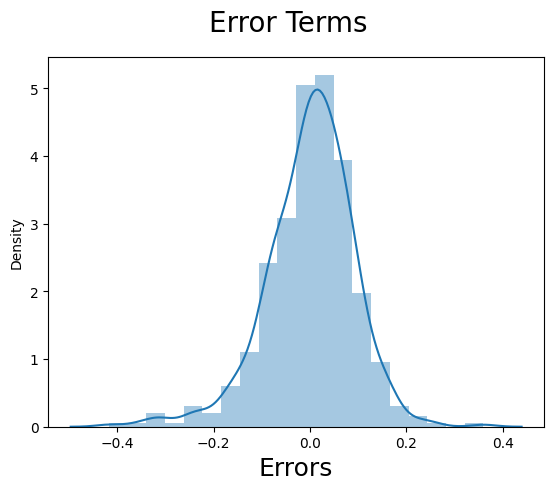

In [543]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

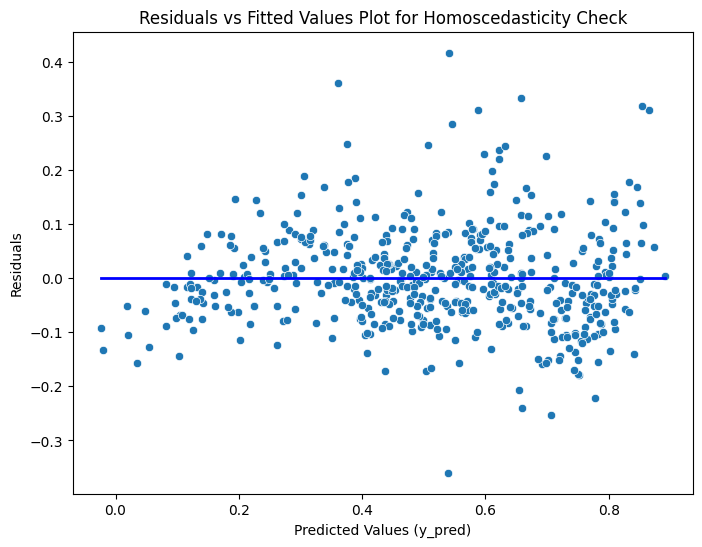

In [545]:
# Confirming linear Homoscedasticity


residuals = y_train_pred - y_train

# Plotting the residuals vs fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals)

# Adding the horizontal line at y=0 for reference
sns.lineplot(x=[min(y_train_pred), max(y_train_pred)], y=[0, 0], color='blue', linewidth=2)

# Adding labels and title
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Plot for Homoscedasticity Check')

# Display the plot
plt.show()

#### Step 6: Making Predictions Using the Final Model on Test Data 

In [548]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
184,0,1,0,0.831783,0.769663,0.657365,0.084226,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901380,0.842592,0.610128,0.153725,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511974,0.496141,0.837699,0.334210,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795338,0.437099,0.339569,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817256,0.741468,0.314297,0.537413,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [550]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558951,0.532994,0.638506,0.313358,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233699,0.217884,0.148973,0.159945,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046590,0.025963,0.261918,-0.042803,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354653,0.344757,0.527267,0.198534,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558716,0.549197,0.627739,0.299461,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759117,0.714139,0.743925,0.403051,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984440,0.980941,1.002143,0.807483,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [552]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
184,0,1,0,0.831783,0.769663,0.657365,0.084226,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901380,0.842592,0.610128,0.153725,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511974,0.496141,0.837699,0.334210,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795338,0.437099,0.339569,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817256,0.741468,0.314297,0.537413,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [554]:
model_choosen_columns = X_train_new.columns
X_test = X_test[model_choosen_columns]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)
y_pred = lr_5.predict(X_test_lm_5)

In [556]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8035

#### Step 7: Model Fit & Conclusion

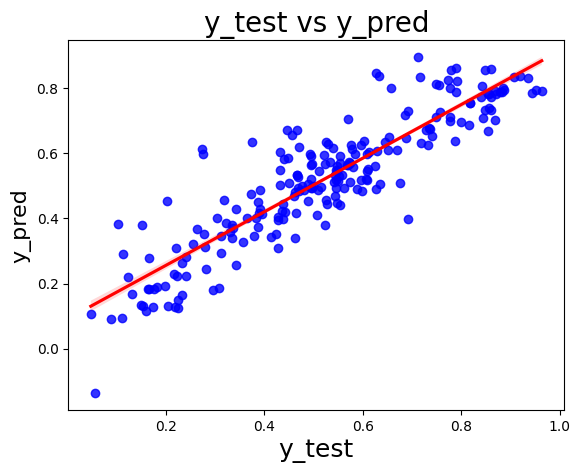

In [559]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [561]:
round(lr_5.params,4)

const                0.1910
yr                   0.2341
holiday             -0.0969
temp                 0.4782
windspeed           -0.1482
season_spring       -0.0551
season_summer        0.0610
season_winter        0.0959
mnth_Sep             0.0909
weathersit_Cloudy   -0.0801
weathersit_Rainy    -0.2860
dtype: float64

#### _Model Equation: 0.1910 + (0.2341 * Yr) - (0.2341 * Holiday) + (0.4782 * temp) - (0.1482 * windspeed) - (0.0551* season_spring) + ( 0.0610* season_summer) + (0.0959 * season_winter)_

####                     _+ (0.0909 * mnth_Sep)  - (0.0801 * weathersit_Cloudy) - (0.2860 * weathersit_Rainy)_

### 1. Model Fit:
R-squared: 0.833 – This model explains about 83.3% of the variance in bike rentals, which is very strong.
Adjusted R-squared: 0.830 – After adjusting for the number of predictors, the model still explains 83% of the variance, indicating a good fit.
F-statistic: 249.2 (p-value: 7.37e-187) – The model is highly significant, and the predictors as a group are meaningful.
### 2. Coefficients (Impact of Predictors):
const: 0.1910 – The intercept term is the baseline value when all independent variables are zero.
yr (year): 0.2341 – The number of bike rentals increases by approximately 0.2341 units for each year increase.
holiday: -0.0969 – Bike rentals are lower on holidays by 0.097 units on average, a statistically significant result.
temp (temperature): 0.4782 – For each increase of 1 degree in temperature, the number of rentals increases by 0.478, showing a strong positive relationship.
windspeed: -0.1482 – For each unit increase in windspeed, the number of rentals decreases by 0.148, which is statistically significant.
season_spring: -0.0551 – Spring season reduces rentals by about 0.055 compared to other seasons.
season_summer: 0.0610 – Summer season increases rentals by 0.061, which is significant at p < 0.0001.
season_winter: 0.0959 – Winter season increases rentals by 0.096, statistically significant.
mnth_Sep (September): 0.0909 – Bike rentals in September are higher by 0.091, a statistically significant increase.
weathersit_Cloudy: -0.0801 – Cloudy weather results in a decrease in rentals by 0.0801.
weathersit_Rainy: -0.2860 – Rainy weather has a substantial negative effect on bike rentals, reducing them by 0.286, which is highly significant.
###  3. Statistical Significance:
Most predictors are statistically significant with p-values well below 0.05, suggesting that the relationships between these variables and bike rentals are not due to random chance.
Holiday, windspeed, season, weather conditions, and temperature all have strong and meaningful effects on bike rentals.